In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def diff_sigmoid(x):
    return x * (1 - x)

In [46]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [47]:
import seaborn as sns

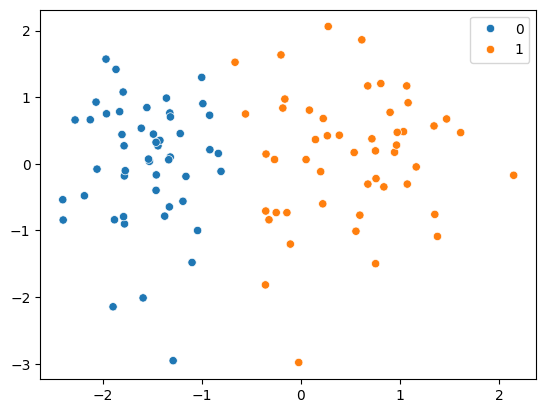

In [48]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()


In [49]:
w1 = np.random.randn(2,4)
b1 = np.zeros((1,4))


w2 = np.random.randn(4,1)
b2 = np.zeros((1,1))

In [50]:
loss_history=[]
learning_rate = 0.1

In [51]:
epochs = 1000

In [53]:
for epoch in range(epochs):
    z1 = X@w1 + b1

    a1 = sigmoid(z1)

    z2 = a1@w2 + b2

    y_reshaped = y.reshape(-1,1)

    y_hat = sigmoid(z2)

    loss = np.mean((y_hat - y_reshaped)**2)*learning_rate

    loss_history.append(loss)

    d_output =(y_hat-y_reshaped) * diff_sigmoid(y_hat)

    d_w2 = a1.T@d_output
    d_b2 = np.sum(d_output, axis=0)

    d_hidden = (d_output@w2.T) * diff_sigmoid(a1)

    dw1 = X.T@d_hidden
    db1 = np.sum(d_hidden, axis=0)

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1

    w2 = w2 - learning_rate*d_w2
    b2 = b2 - learning_rate*d_b2

    if epoch % 100 == 0:
        print(f"Epoch {epoch} loss: {loss}")

    

Epoch 0 loss: 0.03482851674736394
Epoch 100 loss: 0.0006873740670575957
Epoch 200 loss: 0.0003515676688659689
Epoch 300 loss: 0.0002283399590873138
Epoch 400 loss: 0.00016423341702888442
Epoch 500 loss: 0.000125658219582588
Epoch 600 loss: 0.00010031892159645958
Epoch 700 loss: 8.263127317609458e-05
Epoch 800 loss: 6.971303390657547e-05
Epoch 900 loss: 5.993965744633089e-05


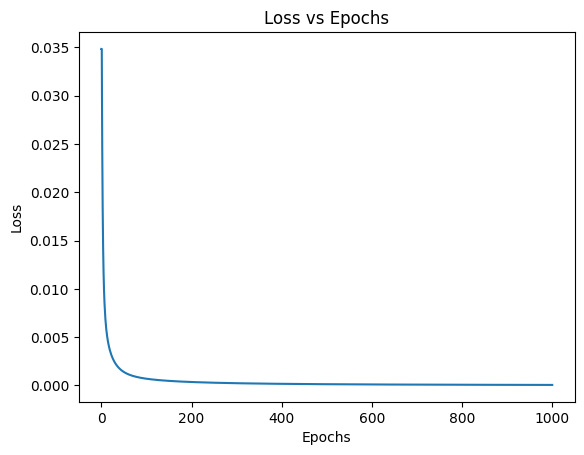

In [54]:
plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [55]:
predictions = (y_hat > 0.5).astype(int)
print("Predictions:\n", predictions[:10])
print("Actual:\n", y[:10])


Predictions:
 [[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]
Actual:
 [1 1 1 0 1 0 0 1 1 0]
